<h1>Содержание<span class="tocSkip"></span></h1>
</span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Тренд-и-сезонность" data-toc-modified-id="Тренд-и-сезонность-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тренд и сезонность</a></span></li><li><span><a href="#Сбор-признаков-датафрейма" data-toc-modified-id="Сбор-признаков-датафрейма-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сбор признаков датафрейма</a></span></li><li><span><a href="#Разделение-выборки" data-toc-modified-id="Разделение-выборки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Разделение выборки</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Кросс-валидация-RandomizedSearchCV-для-CatBoostRegressor" data-toc-modified-id="Кросс-валидация-RandomizedSearchCV-для-CatBoostRegressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Кросс-валидация RandomizedSearchCV для CatBoostRegressor</a></span></li><li><span><a href="#Кросс-валидация-RandomizedSearchCV-для-LGBMRegressor" data-toc-modified-id="Кросс-валидация-RandomizedSearchCV-для-LGBMRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Кросс-валидация RandomizedSearchCV для LGBMRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Результат-на-тестовой-выборке-для-CatBoostRegressor" data-toc-modified-id="Результат-на-тестовой-выборке-для-CatBoostRegressor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Результат на тестовой выборке для CatBoostRegressor</a></span></li><li><span><a href="#Результат-на-тестовой-выборке-для-для-LGBMRegressor" data-toc-modified-id="Результат-на-тестовой-выборке-для-для-LGBMRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Результат на тестовой выборке для для LGBMRegressor</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span><ul class="toc-item"><li><span><a href="#Проверка-предсказанием-среднего-значения" data-toc-modified-id="Проверка-предсказанием-среднего-значения-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка предсказанием среднего значения</a></span></li><li><span><a href="#Проверка-предсказанием-предыдущего-значения" data-toc-modified-id="Проверка-предсказанием-предыдущего-значения-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка предсказанием предыдущего значения</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания по такси собрала исторические данные о заказах в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.

## Подготовка

In [222]:
# импорт требуемых библиотек

import pandas as pd              # программная библиотека для обработки и анализа данных, поверх библиотеки NumPy
import numpy as np               # поддержка многомерных массивов; поддержка высокоуровневых математических функций
import matplotlib.pyplot as plt  # библиотека для визуализации данных двумерной графикой

from statsmodels.tsa.seasonal import seasonal_decompose # функция инструмент декомпозиции временных рядов

from sklearn.model_selection import train_test_split   # функция train_test_split для разделения датафрейма

from sklearn.metrics import mean_squared_error         # импорт среднеквардатичного отклонения для оценки качества модели

from sklearn.model_selection import RandomizedSearchCV      # импортируем инструмент кросс-валидации и обучения модели (рандом)
from scipy.stats import randint                             # подбор рандомных значений в диапазоне
from lightgbm import LGBMRegressor                          # алгоритм «лёгкого градиентного бустинга»
from catboost import CatBoostRegressor                      # алгоритм «градиентного бустинга CatBoost»

from sklearn.model_selection import TimeSeriesSplit         # инструмент кросс-валидации для временных рядов

In [203]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [204]:
# внешний вид исходного датафрейма

df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [205]:
# проверим хронологический порядок дат / индексов

print(df.index.is_monotonic)

True


In [206]:
# проведем ресемплированние данных за один час (по сумме заказов)

df = df.resample('1H').sum()

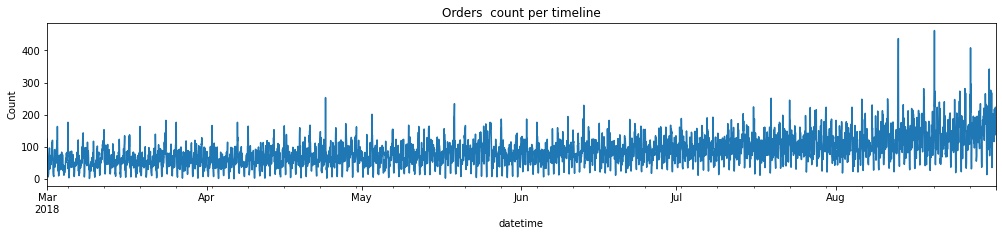

In [207]:
df['num_orders'].plot(
    figsize=(17,3),
    title='Orders  count per timeline'
).set_ylabel('Count')                 
plt.show()

In [208]:
# общая информация

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


**Выводы:**
- 26496 объекта / строк и один столбец с количеством заказов - 'num_orders';
    - 4416 объектов / строк и 1 столбец после группировки данных за 1 час;
    - данные за каждые 10 минут переведены в сумму за час;
- данные с марта по сентябрь 2018г. в хронологическом порядке;
- пропусков в данных нет.

## Анализ

### Тренд и сезонность

In [209]:
decomposed = seasonal_decompose(df)

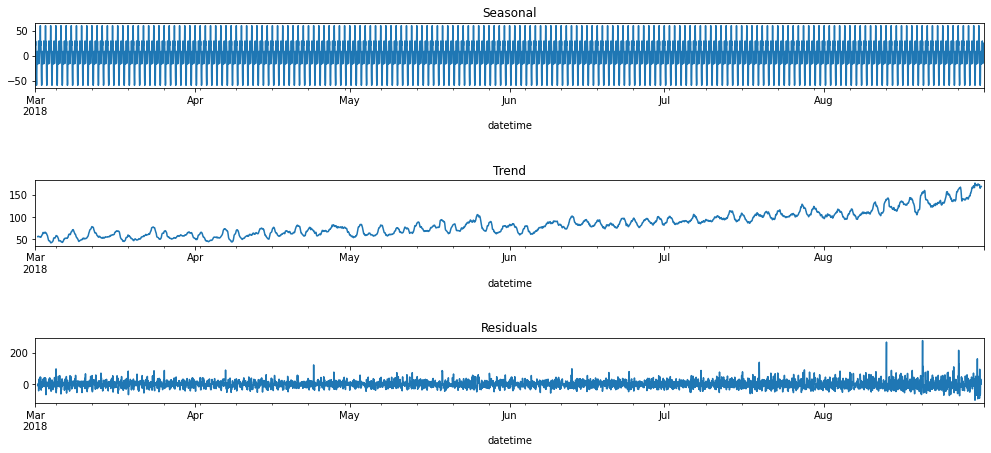

In [210]:
plt.figure(figsize=(17,7))

plt.subplot(5,1,1)
plt.title("Seasonal")
decomposed.seasonal.plot(ax=plt.gca())

plt.subplot(5,1,3)
plt.title("Trend")
decomposed.trend.plot(ax=plt.gca())

plt.subplot(5,1,5)
plt.title("Residuals")
decomposed.resid.plot(ax=plt.gca())
plt.show()

Визуально виден тренд на увеличение числа заказов такси, начиная с начала года.

Cезонность на коротком интервале (за 2 недели июня 2018г.):

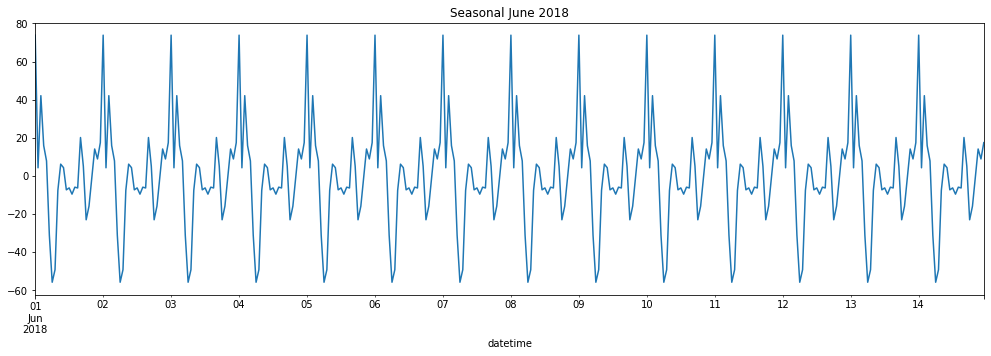

In [211]:
plt.figure(figsize=(17,5))
plt.title("Seasonal June 2018")
seasonal_decompose(df['2018-06-01 00:00:00':'2018-06-14 23:00:00']).seasonal.plot()
plt.show()

In [212]:
df['num_orders'].describe() #проверим данные на аномалии и вылеты по значениям

count    4416.000000
mean       84.422781
std        45.023853
min         0.000000
25%        54.000000
50%        78.000000
75%       107.000000
max       462.000000
Name: num_orders, dtype: float64

In [213]:
print("Количество пропусков в данных:", df['num_orders'].isna().count()) #проверим данные отсутствующие значения

Количество пропусков в данных: 4416


In [214]:
# заменим пропуски на нулевые значения

df['num_orders'] = df['num_orders'].fillna(0)

### Сбор признаков датафрейма

In [215]:
# соберем признаки датафрейма в новый массив:
    # данные за прошлые периоды
    # плавающее среднее от величина окна
    
def collect_features_df(dataframe, lag_count, rolling_window):
    new_df = dataframe.copy()
    
    new_df['year'] = dataframe.index.year
    new_df['month'] = dataframe.index.month
    new_df['day'] = dataframe.index.day
    new_df['dayofweek'] = dataframe.index.dayofweek
    new_df['hour'] = dataframe.index.hour
    
    for lag in range(1, lag_count+1):
        new_df['lag_{}'.format(lag)] = new_df.iloc[:, 0].shift(lag)
        
    new_df['rolling_mean'] = new_df.iloc[:, 0].shift().rolling(rolling_window).mean()
    
    return new_df

In [216]:
lag_count = 7          # задаем значение отставания, чтобы учесть тренд и сезонность

rolling_window = 7     # задаем окно прогнозирования среднего значения (насколько точный нужен прогноз)

df_new = collect_features_df(df, lag_count, rolling_window)

In [220]:
df_new.head(10)

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean
datetime,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 05:00:00,6,2018,3,1,3,5,43.0,66.0,71.0,85.0,124.0,NaN,NaN,NaN
2018-03-01 06:00:00,12,2018,3,1,3,6,6.0,43.0,66.0,71.0,85.0,124.0,NaN,NaN
2018-03-01 07:00:00,15,2018,3,1,3,7,12.0,6.0,43.0,66.0,71.0,85.0,124.0,58.142857
2018-03-01 08:00:00,34,2018,3,1,3,8,15.0,12.0,6.0,43.0,66.0,71.0,85.0,42.571429


### Разделение выборки

In [218]:
# размер тестовой выборки 10%
# не перемешивать, чтобы не сбить временной ряд

train, test = train_test_split(df_new, test_size=0.1, random_state=42, shuffle=False)

print("Размер обучающей выборки:", train.shape)
print("Размер тестовой выборки:", test.shape)

Размер обучающей выборки: (3974, 14)
Размер тестовой выборки: (442, 14)


In [219]:
train_features = train.drop('num_orders', axis=1)
train_target = train['num_orders']

test_features = test.drop('num_orders', axis=1)
test_target = test['num_orders']

## Обучение

### Кросс-валидация RandomizedSearchCV для CatBoostRegressor

Модель выбрана по балансу: точность прогноза и время обучения, предсказания модели.

In [223]:
# необходимо разделение временного ряда для кросс валидации

tscv = TimeSeriesSplit(n_splits=5)

In [225]:
%%time

param_grid = {'n_estimators': randint(100, 500),           # количество деревьев в модели
              'learning_rate': np.linspace(0.1, 0.5, 5),  # скорость обучения модели / скорость сокращения шага градиентного спуска
              'max_depth': randint(5, 15)                  # глубина дерева в модели
             }

random_search_cat = RandomizedSearchCV(
                                   CatBoostRegressor(loss_function="RMSE",random_state=42,verbose=False),
                                   param_grid,
                                   scoring='neg_root_mean_squared_error',
                                   random_state=42,
                                   cv=tscv,
                                   n_jobs=-1
                                  )

random_search_cat.fit(train_features, train_target)

CPU times: user 12min 40s, sys: 23.8 s, total: 13min 4s
Wall time: 13min 23s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=<catboost.core.CatBoostRegressor object at 0x7f784c965280>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f784c87bcd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f784c99ad90>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [226]:
print("Результат по RMSE для CatBoost", round(random_search_cat.best_score_,2))
print()
print("Параметры модели:", random_search_cat.best_params_)

Результат по RMSE для CatBoost -26.14

Параметры модели: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 260}


### Кросс-валидация RandomizedSearchCV для LGBMRegressor

Модель выбрана за высокий результат по прогнозу, однако, время обученя модели может быть очень продолжительным.

In [227]:
%%time

 param_grid = {'n_estimators': randint(100, 500),          # количество деревьев в модели
              'learning_rate': np.linspace(0.1, 0.5, 5),   # скорость обучения модели / скорость сокращения шага градиентного спуска
              'max_depth': randint(5, 15),                  # глубина дерева в модели
              'num_leaves': randint(2, 15) 
             }

random_search_lgbm = RandomizedSearchCV(
                                   LGBMRegressor(random_state=42,verbose=0,force_col_wise=True),
                                   param_grid,
                                   scoring='neg_root_mean_squared_error',
                                   random_state=42,
                                   cv=tscv,
                                   n_jobs=-1
                                  )

random_search_lgbm.fit(train_features, train_target)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=LGBMRegressor(force_col_wise=True, random_state=42,
                                           verbose=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f784c1a9cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f784c0247c0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f784c99a310>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [228]:
print("Результат по RMSE для LGBM", round(random_search_lgbm.best_score_,2))
print()
print("Параметры модели:", random_search_lgbm.best_params_)

Результат по RMSE для LGBM -25.83

Параметры модели: {'learning_rate': 0.30000000000000004, 'max_depth': 10, 'n_estimators': 408, 'num_leaves': 3}


## Тестирование

### Результат на тестовой выборке для CatBoostRegressor

In [80]:
%%time

predictions_cat = random_search_cat.predict(test_features)

rmse_cat = mean_squared_error(test_target, predictions_cat)**0.5

print("Результат по RMSE для CatBoost на тестовой выборке", round(rmse_cat,5))

Результат по RMSE для CatBoost на тестовой выборке 44.79167
CPU times: user 3.15 ms, sys: 0 ns, total: 3.15 ms
Wall time: 2.89 ms


**Вывод:** Значение RMSE ниже целевого показателя, равного 48, модель может быть принята основной после проверки на адекватность.

### Результат на тестовой выборке для для LGBMRegressor

In [81]:
%%time

predictions_lgbm = random_search_lgbm.predict(test_features)

rmse_lgbm = mean_squared_error(test_target, predictions_lgbm)**0.5

print("Результат по RMSE для LGBM на тестовой выборке", round(rmse_lgbm,5))

Результат по RMSE для LGBM на тестовой выборке 44.92187
CPU times: user 14.5 ms, sys: 3.59 ms, total: 18.1 ms
Wall time: 67 ms


**Вывод:** Значение RMSE ниже целевого показателя, равного 48, модель может быть принята основной после проверки на адекватность.

## Проверка модели на адекватность

### Проверка предсказанием среднего значения

In [86]:
# создадим ряд/вектор длинной равный тестовой выборке на базе медианного значения

median_test_target = np.ones(test_target.shape)*test_target.median()

In [97]:
print("Результат по RMSE на тестовой выборке по медианному значению:")
print(round(mean_squared_error(test_target, median_test_target)**0.5,2))

Результат по RMSE на тестовой выборке по медианному значению:
58.73


**Вывод:** Обе рассмотренные модели обеспечивают предсказание лучше, что прогноз на базе предыдущего значения.

### Проверка предсказанием предыдущего значения

In [98]:
prev_test_target = test_target.shift() # сдвигаем ряд целевого признака на 1

prev_test_target.iloc[0] = prev_test_target.iloc[-1] # заменяем первое пропущенное значение на последнее из-за смещения

In [99]:
print("Результат по RMSE на тестовой выборке по предыдущему значению:")
print(round(mean_squared_error(test_target, prev_test_target)**0.5,2))

Результат по RMSE на тестовой выборке по предыдущему значению:
59.13


**Вывод:** Обе рассмотренные модели обеспечивают предсказание лучше, что прогноз на базе предыдущего значения.

## Вывод

По результатам реализации проекта были выполнены следующие шаги:

1. Проведен анализ данных:
    - Оценена сезонность и тренд роста числа заказов.
    - Обработаны пропущенные значения.
    
    
2. Собраны признаки для работы временного ряда при машинном обучении.
    - Вручную заданы "лаг" и "окно" анализа временного ряда.
    
    
3. Проведено машинное обучение для двух моделей: CatBoost и LGBM с подбором параметров по методу кросс-валидации RandomizedSearchCV.


4. Результаты моделей по RMSE на тестовой выборке получены выше целевого показателя равного 48:
    - RMSE CatBoost: 44.79167
    - RMSE LGBM: 44.92187
    
    
5. Проведен анализ адекватности построенных моделей по методу предсказания 1) медианы и 2) предыдущего значения.


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48